In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
# train_X = train_X.astype("float64")
# train_y = train_y.astype("float64")
# test_X = test_X.astype("float64")
# test_y = test_X.astype("float64")

In [5]:
test_X = test_X/255
train_X = train_X/255

In [6]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [7]:
train_X.T[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output).T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output).T

In [9]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [10]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [11]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 7
Y onehot: [0 0 0 0 0 0 0 1 0 0]


<Figure size 432x288 with 0 Axes>

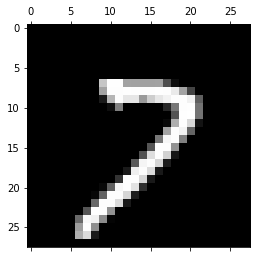

In [12]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])
    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

    # p = np.reshape(train_X_flatten.T[i].T,(28,28))
    # plt.gray()
    # plt.matshow(p)
    # plt.show()



plot_and_label_train_X(np.random.randint(0,1000))

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [14]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [16]:
print(train_y.shape ,train_y_onehot.shape, train_X_flatten.shape)

(60000,) (10, 60000) (784, 60000)


## TRAINING WITHOUT EPOCHS

In [17]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))


learning_rate = 0.1
iterations = 500

X = train_X_flatten # shape -> 784, m
Y = train_y_onehot
m = 60000

correct_predictions = 0
wrong_predictions = 0

for iter in range(iterations):
    # forward prop
    Z1 = W1@X+b1
    A1 = ReLU(Z1)
    Z2 = W2@A1+b2
    A2 = softmax(Z2)

    # backward prop
    dZ2 = A2-Y
    dW2 = 1/m*dZ2@A1.T
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
    dW1 = 1/m*dZ1@X.T
    db1 = 1/m*np.sum(dZ1)

    # update poram
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    

    # accuracy
    if iter % 10 == 0 :
        # print(A2)
        print("Iteration: ", iter)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, train_y))


Iteration:  0
0.12431666666666667
Iteration:  10
0.17798333333333333
Iteration:  20
0.25956666666666667
Iteration:  30
0.36215
Iteration:  40
0.45436666666666664
Iteration:  50
0.5156
Iteration:  60
0.5605166666666667
Iteration:  70
0.5991
Iteration:  80
0.6289166666666667
Iteration:  90
0.65505
Iteration:  100
0.6771666666666667
Iteration:  110
0.6958
Iteration:  120
0.7109333333333333
Iteration:  130
0.7243166666666667
Iteration:  140
0.7363166666666666
Iteration:  150
0.7466
Iteration:  160
0.7560333333333333
Iteration:  170
0.7644
Iteration:  180
0.7716333333333333
Iteration:  190
0.7779666666666667
Iteration:  200
0.7834166666666667
Iteration:  210
0.7892666666666667
Iteration:  220
0.794
Iteration:  230
0.79835
Iteration:  240
0.8030833333333334
Iteration:  250
0.80675
Iteration:  260
0.8107666666666666
Iteration:  270
0.81445
Iteration:  280
0.8174833333333333
Iteration:  290
0.82065
Iteration:  300
0.8233166666666667
Iteration:  310
0.8259333333333333
Iteration:  320
0.82848333

## IMPLEMENTING EPOCH? BUT I DON'T KNOW HOW WOULD IT HELP? WHY NOT JUST USE ALL THE DATA AT ONCE

Decreasing the batch size during training of a neural network can have several potential benefits:

1- Reducing memory requirements: A smaller batch size means that fewer training examples are processed in each iteration, which can reduce the amount of memory required to store the training data and intermediate results. This can be important for training larger neural networks or when working with limited memory resources.

2- More frequent weight updates: A smaller batch size means that the neural network is updated more frequently during each epoch, which can help to speed up the training process and potentially lead to better convergence. With a larger batch size, the weight updates are less frequent, and the optimizer may take longer to converge to the optimal weights.

3- Improved generalization: Smaller batches can help to prevent the neural network from overfitting to the training data by introducing more randomness and variation into the training process. This can help the network to generalize better to new data and improve its performance on the validation and test sets.

However, decreasing the batch size may also have some potential drawbacks:

1- Slower training convergence: With smaller batch sizes, the optimization process may require more iterations or epochs to converge to the optimal weights, which can result in longer training times.

2- Noisier weight updates: With smaller batch sizes, the gradient estimates may be noisier and less accurate, which can lead to more unstable training and slower convergence. This can be mitigated by using techniques such as momentum or weight decay.

3- Overall, the optimal batch size will depend on the specific neural network architecture, dataset, and optimization algorithm used, and it may require experimentation and tuning to find the best value.






In [ ]:

train_X_flatten.T.shape[0]//batch_size

5

## TRAINING WITH EPOCHS

In [20]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))



epochs = 500
batch_size = 60000//1
iterations = train_X_flatten.T.shape[0]//batch_size
learning_rate = 0.1

# m = batch_size
X = train_X_flatten # shape -> 784, m
Y = train_y_onehot # shape -< 10, m

for epoch in range(epochs):

    for iteration in range(iterations):

        X = train_X_flatten.T[(iteration*batch_size):(iteration+1)*batch_size].T
        Y = train_y_onehot.T[(iteration*batch_size):(iteration+1)*batch_size].T
        # print(iter*batch_size)
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

        # accuracy
        if epoch % 10 == 0 :
            # print(A2)
            print("Epoch:", epoch, " Iteration:", iteration)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, train_y.T[(iteration*batch_size):(iteration+1)*batch_size].T))



Epoch: 0  Iteration: 0
0.08321666666666666
Epoch: 10  Iteration: 0
0.16086666666666666
Epoch: 20  Iteration: 0
0.22696666666666668
Epoch: 30  Iteration: 0
0.30375
Epoch: 40  Iteration: 0
0.37248333333333333
Epoch: 50  Iteration: 0
0.42995
Epoch: 60  Iteration: 0
0.48643333333333333
Epoch: 70  Iteration: 0
0.5377666666666666
Epoch: 80  Iteration: 0
0.5785666666666667
Epoch: 90  Iteration: 0
0.611
Epoch: 100  Iteration: 0
0.63665
Epoch: 110  Iteration: 0
0.6580333333333334
Epoch: 120  Iteration: 0
0.6756333333333333
Epoch: 130  Iteration: 0
0.6904166666666667
Epoch: 140  Iteration: 0
0.7041166666666666
Epoch: 150  Iteration: 0
0.7163166666666667
Epoch: 160  Iteration: 0
0.72665
Epoch: 170  Iteration: 0
0.7356666666666667
Epoch: 180  Iteration: 0
0.74425
Epoch: 190  Iteration: 0
0.75155
Epoch: 200  Iteration: 0
0.7579666666666667
Epoch: 210  Iteration: 0
0.7637666666666667
Epoch: 220  Iteration: 0
0.7694
Epoch: 230  Iteration: 0
0.7739
Epoch: 240  Iteration: 0
0.7789833333333334
Epoch: 25

## TEST ACCURACY WITH TEST DATA

In [21]:

X = test_X_flatten
Y = test_y

Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

get_accuracy(get_predictions(A2), Y)


0.8486

## TESTING WITH RANDOM INDIVIDUAL DATA


It looks like:  9
Label: 9
Y onehot: [0 0 0 0 0 0 0 0 0 1]


<Figure size 432x288 with 0 Axes>

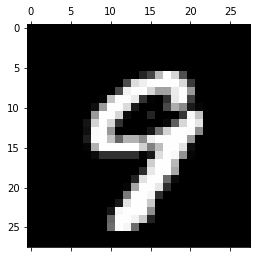

In [35]:
# index = 5151
index = np.random.randint(0,1000)
#plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T
y = train_y_onehot.T[index:index+1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# print(Z1.shape, W1.shape, X.shape) # -> HOW????
print("It looks like: ", np.argmax(A2))
plot_and_label_train_X(index)


In [ ]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

learning_rate = 0.05
iterations = 100



m = 20000
for i in range(0,60000, m):
    X = train_X_flatten.T[i:i+m].T # shape -> 784, m
    Y = train_y_onehot.T[i:i+m].T
    print(i)
    for iter in range(iterations):
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y            
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

       # accuracy
        if iter % 10 == 0 :
            # print(A2)
            print("Iteration: ", iter)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, train_y))


In [ ]:
index = np.random.randint(0,1000)
plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T # shape -> 784, m
Y = train_y_onehot.T[index:index+1].T

#print(X.shape)
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = ReLU(Z2)
print(A2.T[0])
print("guess: ", np.argmax(A2.T[0]), "| certainty: " ,np.max(A2.T[0]) )


In [ ]:
from nnfs.datasets import spiral_data

spiral_data